In [61]:
from spin_ring_api import * 
from numpy.linalg import eig
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [62]:
def proj(a, b):
    a, b = (a, b) if len(a) < len(b) else (b, a)
    b_tr = b[0:len(a)]
    return np.dot(a, b_tr) / (np.linalg.norm(a) * np.linalg.norm(b))

def bias(v, v1, v2): 
    proj1 = proj(v, v1)
    proj2 = proj(v, v2)
    
    return proj1 / (proj1 + proj2), proj2 / (proj1 + proj2)

In [63]:
l = 18

deltas = np.arange(1, 7, dtype=int)

biases = []
for delta in deltas:
	# hvec = get_hamiltonian(l, delta, 0.5)
	hvec = 1 / np.power(np.arange(1, l / 2), delta)

	svec = np.ones(len(hvec))

	truncs = np.arange(1, l / 2 - 1, dtype=int)

	eval1 = np.zeros(len(truncs))
	eval2 = np.zeros(len(truncs))
	bias1 = np.zeros(len(truncs))
	bias2 = np.zeros(len(truncs))
	for i in range(0, len(truncs)):
		evals, evecs = get_eigen(False, l, delta, 0.0, truncs[i])
		eval1[i] = evals[0]
		eval2[i] = evals[1]

		b1 = bias(evecs[0], hvec, svec)
		bias1[i] = b1[0] - b1[1]
		b2 = bias(evecs[1], hvec, svec)
		bias2[i] = b2[0] - b2[1]	
	
	biases.append((eval1, eval2, bias1, bias2))

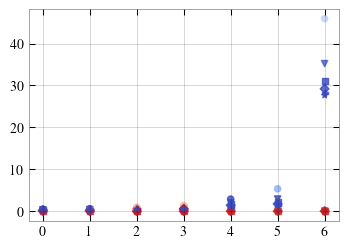

In [64]:
fig, ax = plt.subplots(figsize=(4, 2.75)) 
# Normalize to completely pointing in H or S_tot direction
norm = Normalize(vmin=-0.50, vmax=0.50)

markers = ['o', 'v', 's', 'D', 'P', '*'] 

for i in range(0, len(deltas)):
	eval1, eval2, bias1, bias2 = biases[i]
	for e, b in zip([eval1, eval2], [bias1, bias2]):
		# Drop lowest eigenvalue since that should be zero.
		sc = ax.scatter(np.arange(0, len(truncs)), e[0:], c=b[0:], cmap="coolwarm", norm=norm,
						alpha=0.8, marker=markers[i], s=20)

ax.set_xticks(np.arange(0, len(truncs)))

[Text(1, -0.5, '$S_\\mathrm{tot}$'),
 Text(1, 0.0, '0\\%'),
 Text(1, 0.5, '$H_\\delta$')]

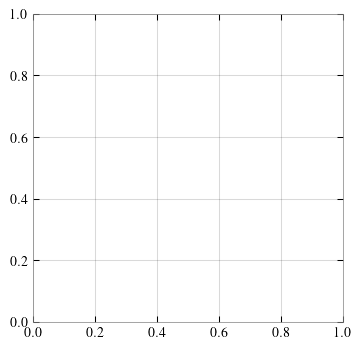

In [65]:
# Colorbar with text labels
cbar = plt.colorbar(sc, ticks=[-0.5, 0, 0.5])
cbar.ax.set_yticklabels(["$S_\mathrm{tot}$", "0\%", "$H_\delta$"])

In [66]:
ax.set_yscale('log')
ax.set_xlabel('Truncations')
ax.set_ylabel('$ \lambda_0 $')

Text(4.444444444444448, 0.5, '$ \\lambda_0 $')

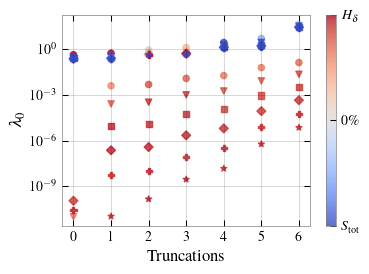

In [67]:
fig